In [1]:
import pandas as pd
import seaborn as sns
import os
import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
##Data exploration and Cleansing

In [4]:
df = pd.read_csv('Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
dfNumbers = df.drop(["type", "nameOrig", "nameDest", "isFraud", "isFlaggedFraud"], axis = 1)
dfNumbers.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0,6362620.0
mean,243.4,179861.9,833883.1,855113.7,1100701.7,1224996.4
std,142.3,603858.2,2888242.7,2924048.5,3399180.1,3674128.9
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,156.0,13389.6,0.0,0.0,0.0,0.0
50%,239.0,74871.9,14208.0,0.0,132705.7,214661.4
75%,335.0,208721.5,107315.2,144258.4,943036.7,1111909.2
max,743.0,92445516.6,59585040.4,49585040.4,356015889.4,356179278.9


In [7]:
dfOther = df.drop(["step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"], axis=1)
dfOther.astype('object').describe()

,type,nameOrig,nameDest,isFraud,isFlaggedFraud
count,6362620,6362620,6362620,6362620,6362620
unique,5,6353307,2722362,2,2
top,CASH_OUT,C1902386530,C1286084959,0,0
freq,2237500,3,113,6354407,6362604


In [8]:
#No duplicate rows
dftemp = df.drop_duplicates()
dftemp.shape

(6362620, 11)

The number of entries flagged fraud is  16


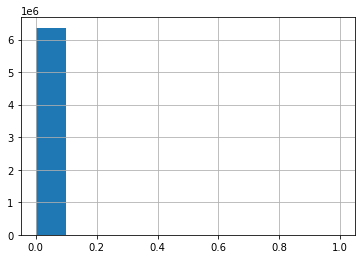

In [9]:
#Very little entries are being flagged as fraud currently
df_lastCol = df.loc[:,"isFlaggedFraud"]
df_lastCol.hist()
print("The number of entries flagged fraud is ", df_lastCol.sum())

In [10]:
# Every entry that is currently flagged fraud is fraud (no false fraud postives)
print(df.loc[df["isFlaggedFraud"] == 1])

         step      type       amount     nameOrig  oldbalanceOrg  \
2736446   212  TRANSFER   4953893.08   C728984460     4953893.08   
3247297   250  TRANSFER   1343002.08  C1100582606     1343002.08   
3760288   279  TRANSFER    536624.41  C1035541766      536624.41   
5563713   387  TRANSFER   4892193.09   C908544136     4892193.09   
5996407   425  TRANSFER  10000000.00   C689608084    19585040.37   
5996409   425  TRANSFER   9585040.37   C452586515    19585040.37   
6168499   554  TRANSFER   3576297.10   C193696150     3576297.10   
6205439   586  TRANSFER    353874.22  C1684585475      353874.22   
6266413   617  TRANSFER   2542664.27   C786455622     2542664.27   
6281482   646  TRANSFER  10000000.00    C19004745    10399045.08   
6281484   646  TRANSFER    399045.08   C724693370    10399045.08   
6296014   671  TRANSFER   3441041.46   C917414431     3441041.46   
6351225   702  TRANSFER   3171085.59  C1892216157     3171085.59   
6362460   730  TRANSFER  10000000.00  C214003857

In [11]:
df.head()
print(df.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [12]:
#This block shows that there are no null entries
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

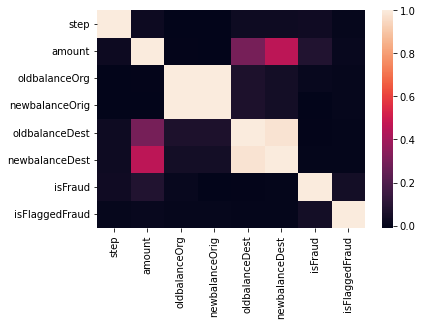

In [13]:
correlation = df.corr()
sns.heatmap(correlation)
#Only visible correlation of isFraud is with amount 

#In terms of multi-colinearity, oldbalanceDest and newbalanceDest are highly related, which makes sense, but 
#will be bad for our model
#Also, amount is moderately related with oldbalanceDest and newbalanceDest, which also makes sense
#The lack of correlation between oldbalanceOrg and newbalanceOrig suggests that something is wrong with the dataset 
#as those two columns should be highly-related

In [15]:
df_onlyFraud = df.loc[df["isFraud"] == 1]
df_onlyFraud.to_csv("data.csv")  
(df_onlyFraud.type.value_counts())
#Conlusion: Only transfers and cash_outs are fraudulent, and about the same amount of each exist 


CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

In [16]:
#Encode the type of transaction into numbers
le_type = LabelEncoder()
df["type"] = le_type.fit_transform(df["type"])

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,3,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,3,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [65]:
#Remove the other types of transactions from the dataframe, because they can never be fraud
# We are keeping only 4 = "Transfer" and 1 = "Cash_Out"
df = df.loc[(df["type"] == 4) | (df["type"] == 1)]
print("We have reduced the number of possible fraudulent entries to",len(df_possibleFraud))

We have reduced the number of possible fraudulent entries to 2770409


In [66]:
print(sum(df["amount"] < 0))
print(sum(df["oldbalanceOrg"] < 0))
print(sum(df["newbalanceOrig"] < 0))
print(sum(df["oldbalanceDest"] < 0))
print(sum(df["newbalanceDest"] < 0))
#There are 0 negative entries in the numerical columns

0
0
0
0
0


In [104]:
#Looking ito the lack of correlation in the oldbalanceOrg and newbalanceOrig columns
df_errorOrig = df[df['amount'] + df["newbalanceOrig"] != df["oldbalanceOrg"]]
print("The percentage of entries that have an error in the origin balances is ", len(df_errorOrig)/len(df) * 100)
df_errorDest = df[df['amount'] + df["oldbalanceDest"] != df["newbalanceDest"]]
print("The percentage of entries that have an error in the destination balances is ",len(df_errorDest)/len(df)*100)

The percentage of entries that have an error in the origin balances is  90.97685576389624
The percentage of entries that have an error in the destination balances is  42.09429004887004


In [141]:
#Create new columns to keep track of which rows have errors in the origin and destination balances
df["error_origin"] = 0
df.loc[(df['amount'] + df["newbalanceOrig"] != df["oldbalanceOrg"]), 'error_origin'] = 1
df["error_dest"] = 0
df.loc[(df['amount'] + df["oldbalanceDest"] != df["newbalanceDest"]), 'error_dest'] = 1

In [142]:
#Look at the correlation of these new columsn with fraud transactions
df_errorOrigFraud = df[(df["error_origin"]==1) & (df["isFraud"]==1)]
df_errorDestFraud = df[(df["error_dest"]==1) & (df["isFraud"]==1)]
frauds = len(df[df["isFraud"] == 1])
print("The percentage of fraud transactions that have an error in origin balance is ", len(df_errorOrigFraud)/frauds * 100)
print("The percentage of fraud transactions that have an error in destination balance is ", len(df_errorDestFraud)/frauds *100)

The percentage of fraud transactions that have an error in origin balance is  0.6940216729575064
The percentage of fraud transactions that have an error in destination balance is  64.82405941799585


In [167]:
##Model

#Variable choice:
# I chose to drop nameOrig and nameDest because they displayed no long-term trend or correlation with fraud entries. 
# As shown in the statistics at the beginning of the notebook, not many repeat names are present anyways

# I chose to replace oldbalanceDest and newbalanceDest with the boolean column error_dest because the model was 
# reacting better to the error

# All the other variables were kept as I discovered that the model performed the best when the most data was provided.

# Stratified data was used to fix the problem of very little fraud entries being present in comparison to non-fraudulent
# entries
# Methods such as under-sampling, over-sampling, and SMOTE were tried, but they lead to no signficant improvement, and
# only complicated the code
from sklearn.tree import DecisionTreeClassifier
X = df[["step", "type", "amount", "oldbalanceOrg", "newbalanceOrig", "error_origin", "error_dest"]]
y = df[["isFraud"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=100)

In [168]:
# A decision tree was used because it offered the highest accuracy, without delving into the extremely slow speeds of 
# a Random Forest Model. 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9999735297904161


Feature: step, Score: 0.03371
Feature: type, Score: 0.00035
Feature: amount, Score: 0.11032
Feature: oldbalanceOrg, Score: 0.15620
Feature: newbalanceOrig, Score: 0.68359
Feature: error_origin, Score: 0.01583
Feature: error_dest, Score: 0.00001


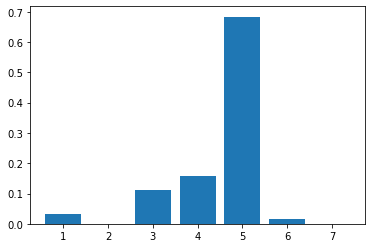

In [169]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X_train.columns[i],v))
# plot feature importance
plt.bar([x+1 for x in range(len(importance))], importance)
plt.show()

Conclusions:

From the decision tree model, it is revealed that the newbalanceOrig is the most important factor in determining whether an entry is fraudulent. This makes sense, because the goal of the fraud agents is to empty out innocent accounts using malicious transfers and cash_outs. Therefore, in many of the circumstances when 0.0 is left in a user's bank account after a cash out or transfer, a fraudulent transaction is taking place. 

However, it is not as easy as simply looking at the newbalanceOrig, the amount, oldbalanceOrig, and error_origin all play a significant role in predicting whether an entry is fraudulent. This makes sense because all 4 of these factors are very heavily linked. 

On the other hand, it is suprirising that error_dest plays barely a significant role in the prediction. I included it because having access to that data improves the accuracy of the model very slightly, but its role is almost nonexistent. This doesn't completely make sense, because the balance destinations should have just as much of a correlation and impact on the predition as the balance origins. I attribute this to the fact that a lot of the balance entries have errors in them (they don't add up mathematically). 

Same applies with the type of the transaction. That makes a lot of sense as a transfer and a cash_out are treated as basically the same by fraud agents. 

This shows us that it is possible to predict fraudulent agents of the type showed in this simulation by very heavily factoring in the amount and the original and ending balances of the user. However, in order to make the system more robust, the company should look into clarfying and solidifying the records of the balances of accounts before and after transactions. Removing errors in non-fraudulent transactions will make the errors in fraudulent transactions more obvious and easier to catch. 
Furthermore, the company should also keep a active eye out for cash-outs and transfers that empty a user's account that are made with high amounts. These are the most likely to be fraudulent. 

In order to test if these measures have worked, we can sample the company's transactions similar to this dataset for another period of time, track the entries marked as fraudulent, and try to determine whether it was done at an accurate rate or not. We could also try to hire malicious "testers" who try to get fraudulent entries by the flagging system. 